In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Excercise1

In [16]:
np.random.seed(42)
array = np.random.randint(20, 60, 100) #Calculation of median by numpy

#Calculation of median by python
sorted_array = sorted(array)
if len(sorted_array) % 2 == 0:
    median_py = (sorted_array[(len(sorted_array) // 2) - 1] + sorted_array[(len(sorted_array) // 2)]) / 2
else:
    median_py = sorted_array[len(sorted_array) // 2]
print('Median by numpy is equal to:  ', np.median(array))
print('Median by python is equal to: ', median_py)

%timeit np.median(array) # Measure the execution time of NumPy's built-in median function
%timeit sorted_array = sorted(array); median_py = (sorted_array[(len(sorted_array) // 2) - 1] + sorted_array[(len(sorted_array) // 2)]) / 2 # Measure execution time of manually calculated median (Python approach)

Median by numpy is equal to:   39.5
Median by python is equal to:  39.5
6.96 μs ± 182 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
9.87 μs ± 49 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


The median value of the given array is **39.5**. As defined, the median splits the dataset into two equal halves: 50% of the values are less than or equal to 39.5, and the remaining 50% are greater than or equal to it.
The interquartile range (IQR), which is the difference between the third quartile (Q3 = 47.25) and the first quartile (Q1 = 28.0), is **19.25**. This means that the central 50% of the data lies within this range.
Among this middle 50%, **27%** of the total data points fall between Q1 and the median, and **25%** fall between the median and Q3. The fact that slightly more values fall below the median suggests a **minor left skew**, but the distribution remains approximately symmetric overall. However, this skewness is minimal, and the distribution is nearly symmetric overall.
In terms of calculation time, NumPy's performance is significantly more optimized than the pure Python approach.

# Excercise2

In [2]:
np.random.seed(40)
height_groupA = np.random.normal(loc = 175, scale = 5, size = 100).astype(int)
height_groupB = np.random.normal(loc = 170, scale = 15, size = 100).astype(int)

#Calculation of mean and standard deviation
print('Average height of group A is:      ', np.mean(height_groupA))
print('Standard deviation of group A is:  ', np.std(height_groupA))
print('Average height of group B is:      ', np.mean(height_groupB))
print('Standard deviation of group B is:  ', np.std(height_groupB))

Average height of group A is:       174.4
Standard deviation of group A is:   4.931531202375181
Average height of group B is:       168.96
Standard deviation of group B is:   15.118148034729652


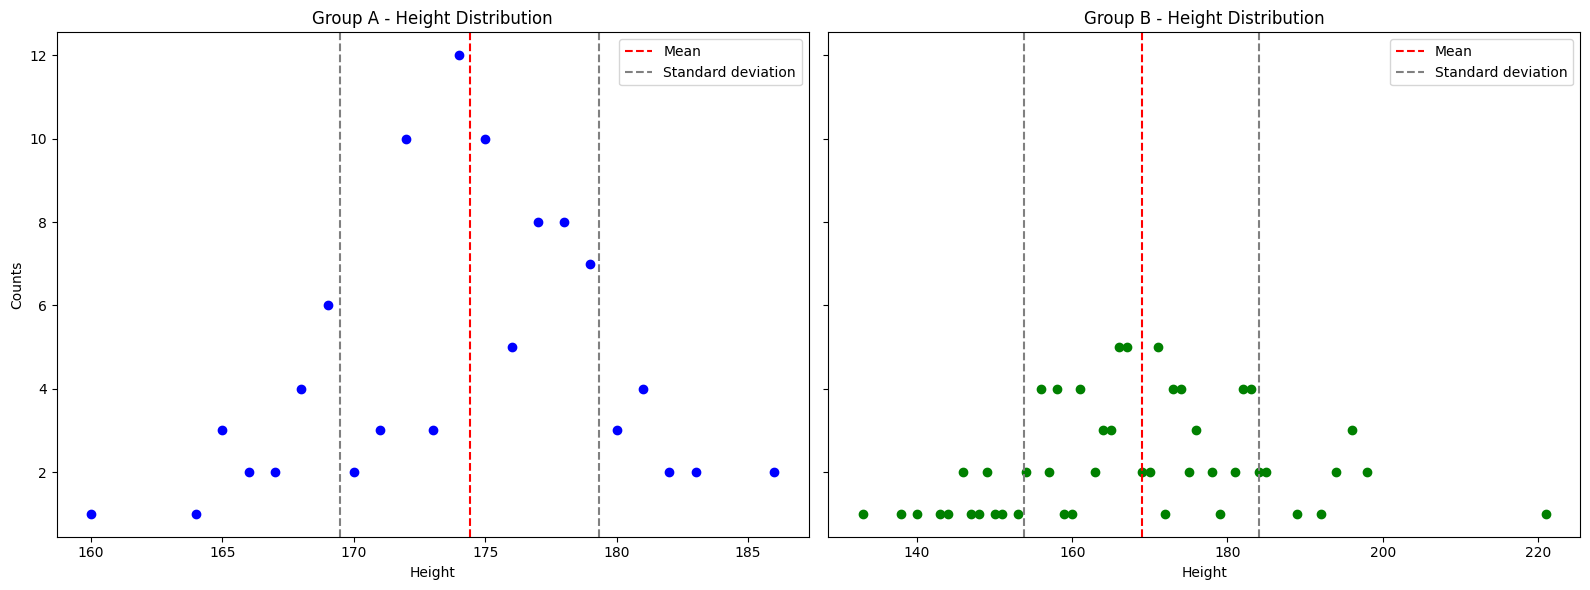

In [6]:
heightsA, numbersA = np.unique(height_groupA, return_counts=True)
heightsB, numbersB = np.unique(height_groupB, return_counts=True)

fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
#Group A
axs[0].scatter(heightsA, numbersA, color='blue')
axs[0].set_title('Group A - Height Distribution')
axs[0].set_xlabel('Height')
axs[0].set_ylabel('Counts')
axs[0].axvline(np.mean(height_groupA), color='red', linestyle='--', label='Mean')
axs[0].axvline((np.mean(height_groupA) - np.std(height_groupA)), color='gray', linestyle='--', label='Standard deviation')
axs[0].axvline((np.mean(height_groupA) + np.std(height_groupA)), color='gray', linestyle='--')
axs[0].legend()

#Group B
axs[1].scatter(heightsB, numbersB, color='green')
axs[1].set_title('Group B - Height Distribution')
axs[1].set_xlabel('Height')
axs[1].axvline(np.mean(height_groupB), color='red', linestyle='--', label='Mean')
axs[1].axvline((np.mean(height_groupB) - np.std(height_groupB)), color='gray', linestyle='--', label='Standard deviation')
axs[1].axvline((np.mean(height_groupB) + np.std(height_groupB)), color='gray', linestyle='--')
axs[1].legend()
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_133860\28651130.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([height_groupA, height_groupB], labels = ['Group A', 'Group B'])


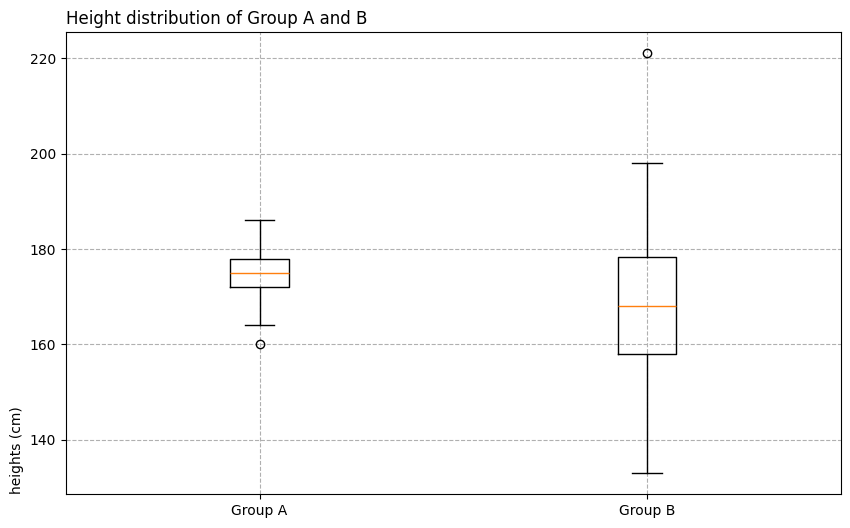

In [33]:
plt.figure(figsize = (10, 6))
plt.boxplot([height_groupA, height_groupB], labels = ['Group A', 'Group B'])
plt.title('Height distribution of Group A and B', loc = 'left')
plt.ylabel('heights (cm)', loc = 'bottom')
plt.grid(True, linestyle='--')
plt.show()

Each of the two height groups, A and B, contains one outlier. When these outliers are excluded, the height distributions of both groups approximate a normal distribution. In Group A, the greatest concentration of height measurements is observed around the mean, with approximately 71% of individuals having heights within the range of 170 to 180 cm. In Group B, approximately 74% of individuals fall within the range of 155 to 185 cm. These intervals were calculated using the formula: mean ± standard deviation.
Group B exhibits a wider spread in height distribution, indicating greater variability, while group A's height values are more tightly clustered around the mean, showing a more compact distribution.
The presence of outliers is also evident in the boxplot analysis. Excluding the outlier, Group A shows lower dispersion compared to Group B, with the maximum and minimum values not differing significantly. Half of the height data in group A fall within the interval of 172 to 178 cm, a span of only 6 cm, indicating a relatively uniform height distribution. In contrast, the interquartile range (IQR) in Group B spans approximately 20 cm, with the majority of individuals falling within the 158 to 178 cm interval, indicating greater variability in height.

# Exercise3

In [4]:
sales =np.array([12, 15, 14, 10, 13, 50, 14, 16, 15, 14, 13, 12, 14, 15, 11, 13, 14, 13, 12, 200])

print('Average sales is:      ', np.mean(sales))
print('Median of sales is:    ', np.median(sales))
print('Standard deviation is: ', np.std(sales))

Average sales is:       24.5
Median of sales is:     14.0
Standard deviation is:  41.07006208906921


In [38]:
#Identification of outliers using IQR method
Q1 = np.percentile(sales, 25)
Q3 = np.percentile(sales, 75)
IQR =np.subtract(Q3, Q1)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_iqr = sales[(sales < lower_bound) | (sales > upper_bound)]
drop_outlier_iqr = sales[(sales >= lower_bound) & (sales <= upper_bound)]

print('Outliers:                               ', outlier_iqr)
print('Average sale after drop outliers:       ', np.mean(drop_outlier_iqr))
print('Median after drop outliers:             ', np.median(drop_outlier_iqr))
print('Standard deviation after drop outliers: ', np.std(drop_outlier_iqr))

Outliers:                                [ 50 200]
Average sale after drop outliers:        13.333333333333334
Median after drop outliers:              13.5
Standard deviation after drop outliers:  1.49071198499986


In [5]:
#Identification of outliers using 3 sigma method
lower_bound = np.mean(sales) - 3 * np.std(sales)
upper_bound = np.mean(sales) + 3 * np.std(sales)

outlier_sigma = sales[(sales < lower_bound) | (sales > upper_bound)]
drop_outlier_sigma = sales[(sales >= lower_bound) & (sales <= upper_bound)]
print('Outliers:                               ', outlier_sigma)
print('Average sale after drop outliers:       ', np.mean(drop_outlier_sigma))
print('Median after drop outliers:             ', np.median(drop_outlier_sigma))
print('Standard deviation after drop outliers: ', np.std(drop_outlier_sigma))


Outliers:                                [200]
Average sale after drop outliers:        15.263157894736842
Median after drop outliers:              14.0
Standard deviation after drop outliers:  8.315123224476421


The mean value is highly influenced by outliers. As calculated, **the presence of outliers significantly increased the mean**, and once the data was cleaned, the mean dropped substantially. By identifying and removing outliers using the IQR and Three Sigma methods, the mean moved closer to a more reasonable value.
Outliers also impact the standard deviation, increasing the distance of data points from the mean. After removing these outliers, the standard deviation was considerably reduced. In contrast, the median is not greatly affected by outliers; as shown in the calculations, the median remained unchanged after the removal of outliers.
Following the removal of outliers, it was concluded that sales data exhibited low dispersion, with most values recorded within a narrow range and showing little deviation from the mean. After removing outliers mean value get closer to median this means that data was skewed so then the alignment of the mean and the median indicates that the data follows a normal distribution.
A comparison between the IQR and Three Sigma methods reveals that the IQR method results in a more favorable standard deviation, with the data being better distributed around the mean. **So mean and standard deviation are sensitive to outliers but median is not.**

# Exercise4

In [40]:
np.random.seed(42)
work_hours = np.random.randint(30, 60, 30)
production = np.random.randint(100, 300, 30)

correlation = np.corrcoef(work_hours, production)
correlation

array([[ 1.        , -0.02006271],
       [-0.02006271,  1.        ]])

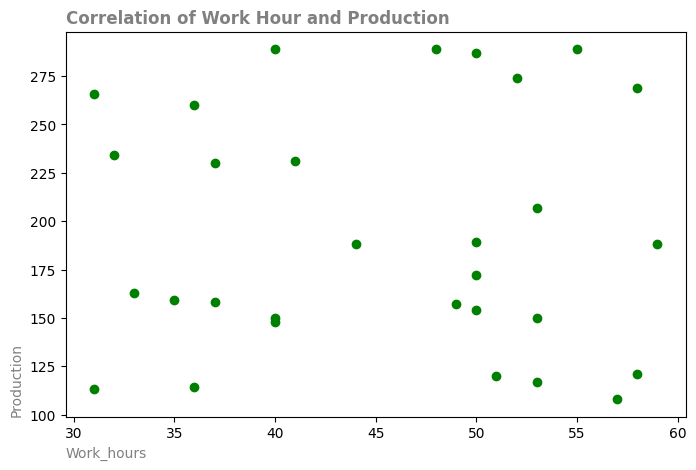

In [44]:
plt.figure(figsize = (8,5))
plt.scatter(work_hours, production , color = "green")
plt.title("Correlation of Work Hour and Production" , color = "gray" , loc="left" , weight = "bold")
plt.xlabel("Work_hours" , color = "gray" , loc= "left")
plt.ylabel("Production" , color = "gray" , loc="bottom")
plt.show()

The **correlation coefficient between working hours and production** was calculated as **-0.02**, which is a value very close to zero. Although the negative sign indicates an inverse relationship, the fact that the value is so close to zero suggests that **there is essentially no meaningful relationship between the two variables**. In other words, longer working hours do not necessarily lead to higher or lower production. The influence between these two variables is approximately **indirect and tends toward neutrality**.

# Exercise5

In [14]:
np.random.seed(42)
study_hours = np.round((np.random.uniform(0, 8, 100)), 1)
exam_score = 50 + 5 * study_hours

values, counts = np.unique(exam_score, return_counts=True)
mode = values[np.argmax(counts)]

#Measures of Central Tendency
print('Mean :               ', np.mean(exam_score))
print('Median :             ', np.median(exam_score))
print('Mode :               ', mode)

#Measures of Dispersion
print('Range:               ',np.subtract(np.max(exam_score), np.min(exam_score)))
print('Variance :           ', np.var(exam_score, ddof=1))
print('Standard deviation : ', np.std(exam_score))
print('IQR :                ', np.subtract(np.percentile(exam_score, 75), np.percentile(exam_score, 25)))
correlation = np.corrcoef(study_hours, exam_score)
correlation


Mean :                68.835
Median :              68.5
Mode :                81.0
Range:                39.5
Variance :            141.8538131313131
Standard deviation :  11.850539017276809
IQR :                 21.25


array([[1., 1.],
       [1., 1.]])

The data exhibits a relatively **moderate level of dispersion** overall. Since the mean **68** is slightly higher than the median and mode **65**, the distribution may be slightly right-skewed. However, due to the small difference, the distribution can be considered approximately normal or only **mildly right-skewed**.
The IQR indicates that the core of the data is relatively concentrated, while the higher values of the standard deviation and range suggest the presence of some data points that are farther from the center.